In [ ]:
import numpy as np
import keras

import os
import cv2
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import layer_normalization


import time
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt 
from keras.preprocessing.image import load_img
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path= '/content/drive/MyDrive/3DV-eye/train'
valid_path= '/content/drive/MyDrive/3DV-eye/valid'
batch_size=32
train_batches =ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),batch_size=batch_size)
valid_batches =ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),batch_size=batch_size)

Found 655 images belonging to 3 classes.
Found 189 images belonging to 3 classes.


In [ ]:
steps_train = train_batches.n / batch_size
steps_train


20.46875

In [ ]:
steps_valid = valid_batches.n / batch_size
steps_valid


5.90625

In [ ]:
num_classes = train_batches.num_classes
num_classes

3

In [ ]:
cls_train = train_batches.classes
cls_test =  valid_batches.classes
class_names = list(train_batches.class_indices.keys())
class_names

['-10V_eyes', '0V_eyes', '10V_eyes']

In [ ]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]
image_paths_train = path_join(train_path, train_batches.filenames)
image_paths_test = path_join(valid_path, valid_batches.filenames)

def plot_images(images, cls_true, cls_pred=None, smooth=True):
    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]
                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)
            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

def load_images(image_paths):
    # Load the images from disk.
    images = [plt.imread(path) for path in image_paths]
    # Convert to a numpy array and return it.
    return np.asarray(images)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


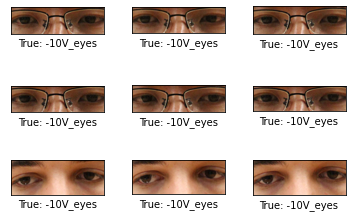

In [ ]:
# Load the first images from the train-set.
images = load_images(image_paths=image_paths_train[0:9])
# Get the true classes for those images.
cls_true = cls_train[0:9]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=True)

In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, Activation

In [ ]:
model = Sequential() 

#1st conv block
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPool2D(pool_size=(2, 2)))
#2nd conv block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#3rd conv block
model.add(Conv2D(256, (3, 3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2)))
#4rd conv block
model.add(Conv2D(512, (3, 3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2)))
#5rd conv block
model.add(Conv2D(512, (3, 3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2)))
#ANN block
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# Model visualization
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [ ]:
#Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"] )


In [ ]:
epochs=50
#compile the model
#model.compile(Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit_generator(generator=train_batches,
                                  epochs=epochs,
                                  steps_per_epoch=steps_train,
                                  validation_data=valid_batches,
                                  validation_steps=steps_valid)
end = time.time()

print ("Model took %0.2f seconds to train"%(end - start))
result = model.evaluate_generator(valid_batches, steps=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
20/20 [==============================] - 134s 6s/step - loss: 33.0021 - accuracy: 0.3527 - val_loss: 1.0967 - val_accuracy: 0.4021
Epoch 2/50
20/20 [==============================] - 9s 414ms/step - loss: 1.1080 - accuracy: 0.3679 - val_loss: 1.0957 - val_accuracy: 0.3228
Epoch 3/50
20/20 [==============================] - 8s 410ms/step - loss: 1.0872 - accuracy: 0.4198 - val_loss: 1.0480 - val_accuracy: 0.4868
Epoch 4/50
20/20 [==============================] - 8s 411ms/step - loss: 0.9492 - accuracy: 0.5527 - val_loss: 0.8623 - val_accuracy: 0.6085
Epoch 5/50
20/20 [==============================] - 9s 414ms/step - loss: 0.8486 - accuracy: 0.6275 - val_loss: 0.6814 - val_accuracy: 0.6402
Epoch 6/50
20/20 [==============================] - 9s 411ms/step - loss: 0.7391 - accuracy: 0.6687 - val_loss: 0.6842 - val_accuracy: 0.7249
Epoch 7/50
20/20 [==============================] - 8s 411ms/step - loss: 0.6995 - accuracy: 0.6916 - val_loss: 0.6368 - val_accuracy: 0.7143
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test-set classification accuracy: 96.88%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


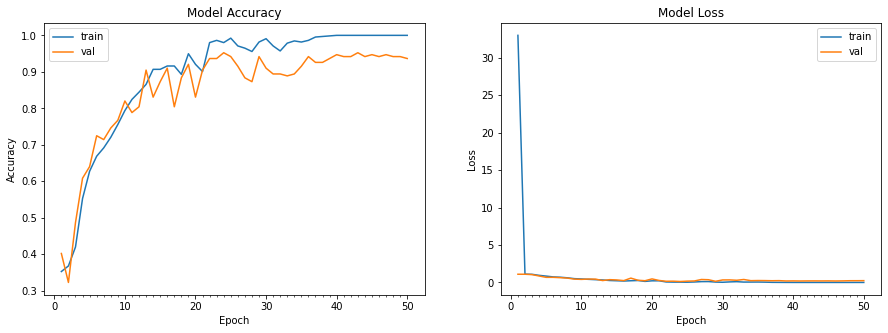

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(history)

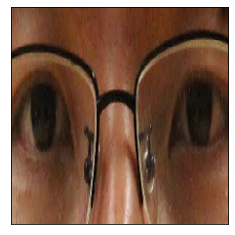

	-10V_eyes ==> 0.03 %
	0V_eyes ==> 99.97 %
	10V_eyes ==> 0.00 %


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/3DV-eye/test/0001_2m_0P_0V_-5H.jpg', target_size = (224,224))
plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1

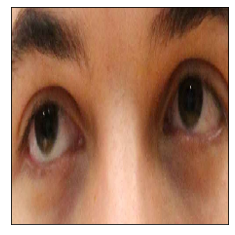

	-10V_eyes ==> 0.00 %
	0V_eyes ==> 0.00 %
	10V_eyes ==> 100.00 %


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/3DV-eye/test/0002_2m_0P_10V_-15H.jpg', target_size = (224,224))
plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1